# Author: Na Qian
# Purpose: Predict baseball players' salary
# Method: Advanced Regression - Ridge and Lasso

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
sns.set_style('whitegrid')
%matplotlib inline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from pylab import rcParams
import warnings

In [2]:
baseball_df=pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQFnZe-im097klmeyuh4H8iv-V2f1-1mMzOOcHyMtNrIVMiLvChNAUDUxutbzF9dX2zV6_CL1-7VnSu/pub?gid=2011624367&single=true&output=csv')
baseball_df.head()

,Salary,count_at_bats,count_hits,count_home_runs,count_runs,RBI,count_walks,years_experience,cumulative_at_bats,cumulative_hits,cumulative_home_runs,cumulative_runs,cumulative_RBI,cumulative_walks,League,Division,PutOuts,Assists,Errors,NewLeague
0,875000,457,101,14,42,63,22,17,6521,1767,281,1003,977,619,A,W,389,39,4,A
1,1300000,441,118,28,84,86,68,8,2723,750,126,433,420,309,A,E,190,2,2,A
2,940000,593,152,23,69,75,53,6,2765,686,133,369,384,321,A,W,315,10,6,A
3,70000,312,68,2,32,22,24,1,312,68,2,32,22,24,A,E,86,150,15,A
4,815000,526,146,13,71,70,84,6,2648,715,77,352,342,289,N,W,303,9,9,N


In [3]:
baseball_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Salary                243 non-null    int64 
 1   count_at_bats         243 non-null    int64 
 2   count_hits            243 non-null    int64 
 3   count_home_runs       243 non-null    int64 
 4   count_runs            243 non-null    int64 
 5   RBI                   243 non-null    int64 
 6   count_walks           243 non-null    int64 
 7   years_experience      243 non-null    int64 
 8   cumulative_at_bats    243 non-null    int64 
 9   cumulative_hits       243 non-null    int64 
 10  cumulative_home_runs  243 non-null    int64 
 11  cumulative_runs       243 non-null    int64 
 12  cumulative_RBI        243 non-null    int64 
 13  cumulative_walks      243 non-null    int64 
 14  League                243 non-null    object
 15  Division              243 non-null    ob

In [8]:
baseball_df.sort_values(by=['Salary'])

,Salary,count_at_bats,count_hits,count_home_runs,count_runs,RBI,count_walks,years_experience,cumulative_at_bats,cumulative_hits,cumulative_home_runs,cumulative_runs,cumulative_RBI,cumulative_walks,League,Division,PutOuts,Assists,Errors,NewLeague
242,0,346,98,5,31,53,30,16,5913,1615,235,784,901,560,A,E,0,0,0,A
206,0,315,59,16,45,36,58,13,4677,1051,268,681,782,697,A,W,0,0,0,A
207,0,307,80,1,42,36,29,7,2421,656,18,379,198,184,A,W,145,2,2,A
208,0,33,6,0,2,4,7,1,33,6,0,2,4,7,A,W,205,5,4,A
209,0,209,45,0,38,19,42,10,3859,916,23,557,279,478,A,W,132,205,5,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,1600000,580,207,8,107,71,105,5,2778,978,32,474,322,417,A,E,121,267,19,A
117,1800000,551,171,13,94,83,94,13,6090,1840,128,969,900,917,N,E,1199,149,5,N
177,1900000,614,163,29,89,83,75,11,5017,1388,266,813,822,617,N,W,303,6,6,N
34,1926000,490,125,24,81,105,62,13,6063,1646,271,847,999,680,N,E,869,62,8,N


In [9]:
#drop records that salary is euqal to 0
baseball_df_trimmed = baseball_df.loc[baseball_df['Salary']>0]

# Describe quantitative variables

In [10]:
baseball_df_trimmed.describe()

,Salary,count_at_bats,count_hits,count_home_runs,count_runs,RBI,count_walks,years_experience,cumulative_at_bats,cumulative_hits,cumulative_home_runs,cumulative_runs,cumulative_RBI,cumulative_walks,PutOuts,Assists,Errors
count,1.840000e+02,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000
mean,5.236196e+05,409.027174,109.364130,11.847826,55.353261,52.092391,41.304348,7.293478,2669.027174,724.342391,72.222826,366.576087,333.125000,264.864130,285.298913,118.391304,8.288043
std,4.085598e+05,141.387366,43.885133,8.428983,24.225268,25.075779,21.271207,4.862116,2297.547487,649.424711,83.689377,334.870654,320.087984,277.282634,272.208199,145.644110,6.596792
min,6.800000e+04,19.000000,4.000000,0.000000,2.000000,3.000000,1.000000,1.000000,19.000000,4.000000,0.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000
25%,1.837500e+05,288.000000,75.500000,5.000000,35.000000,33.000000,24.750000,4.000000,896.750000,217.750000,16.000000,111.250000,96.750000,76.250000,117.500000,7.000000,3.000000
50%,4.275000e+05,416.000000,108.500000,10.000000,54.000000,47.500000,37.000000,6.000000,1953.500000,528.500000,41.500000,272.500000,254.500000,179.500000,223.000000,43.500000,6.000000
75%,7.500000e+05,528.000000,142.500000,18.000000,73.000000,71.250000,53.000000,10.000000,3772.500000,984.250000,97.000000,495.750000,422.750000,317.500000,316.750000,205.250000,12.250000
max,1.975000e+06,687.000000,238.000000,40.000000,117.000000,121.000000,105.000000,24.000000,14053.000000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1377.000000,492.000000,32.000000


# Describe qualitative variables

In [11]:
baseball_df_trimmed['League'].value_counts()

A    102
N     82
Name: League, dtype: int64

In [14]:
#convert 'League' to dummy variables
league_N=pd.get_dummies(baseball_df_trimmed['League'],drop_first=True)
league_N.rename(columns={'N':'league_N'},inplace=True)

In [15]:
baseball_df_trimmed['Division'].value_counts()

E    93
W    91
Name: Division, dtype: int64

In [16]:
#convert 'Division' to dummy variables
Division_W=pd.get_dummies(baseball_df_trimmed['Division'],drop_first=True)
Division_W.rename(columns={'W':'Division_W'},inplace=True)

In [17]:
baseball_df_trimmed['NewLeague'].value_counts()

A    107
N     77
Name: NewLeague, dtype: int64

In [18]:
#convert 'NewLeague' to dummy variables
NewLeague_N=pd.get_dummies(baseball_df_trimmed['NewLeague'],drop_first=True)
NewLeague_N.rename(columns={'N':'NewLeague_N'},inplace=True)

In [19]:
#concat dummy colums to df_treated
baseball_df_trimmed=pd.concat([baseball_df_trimmed,league_N,Division_W,NewLeague_N],axis=1)

In [21]:
baseball_df_trimmed.head(1)

,Salary,count_at_bats,count_hits,count_home_runs,count_runs,RBI,count_walks,years_experience,cumulative_at_bats,cumulative_hits,...,cumulative_walks,League,Division,PutOuts,Assists,Errors,NewLeague,league_N,Division_W,NewLeague_N
0,875000,457,101,14,42,63,22,17,6521,1767,...,619,A,W,389,39,4,A,0,1,0


In [22]:
#drop unnessary columns
baseball_df_trimmed.drop(['League','Division','NewLeague'],axis=1,inplace=True)

In [23]:
baseball_df_trimmed.head(1)

,Salary,count_at_bats,count_hits,count_home_runs,count_runs,RBI,count_walks,years_experience,cumulative_at_bats,cumulative_hits,cumulative_home_runs,cumulative_runs,cumulative_RBI,cumulative_walks,PutOuts,Assists,Errors,league_N,Division_W,NewLeague_N
0,875000,457,101,14,42,63,22,17,6521,1767,281,1003,977,619,389,39,4,0,1,0


# Graph plot

In [24]:
sub_df=pd.DataFrame(baseball_df_trimmed[['Salary','league_N','Division_W','NewLeague_N']])

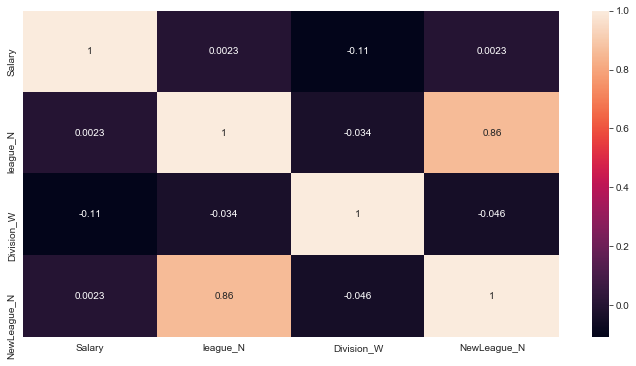

In [25]:
#make heatmap to see the relevancy between salary and league;salary and division;salary and newleague
rcParams['figure.figsize'] = (12,6)
hm=sns.heatmap(sub_df.corr(),annot=True)

In [26]:
sub_df2=pd.DataFrame(baseball_df_trimmed[['Salary','count_at_bats','count_hits','count_home_runs','count_runs','RBI','count_walks','years_experience', 'cumulative_at_bats','cumulative_hits','cumulative_home_runs','cumulative_runs','cumulative_RBI','cumulative_walks','PutOuts','Assists','Errors']])

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5]),
 <a list of 17 Text xticklabel objects>)

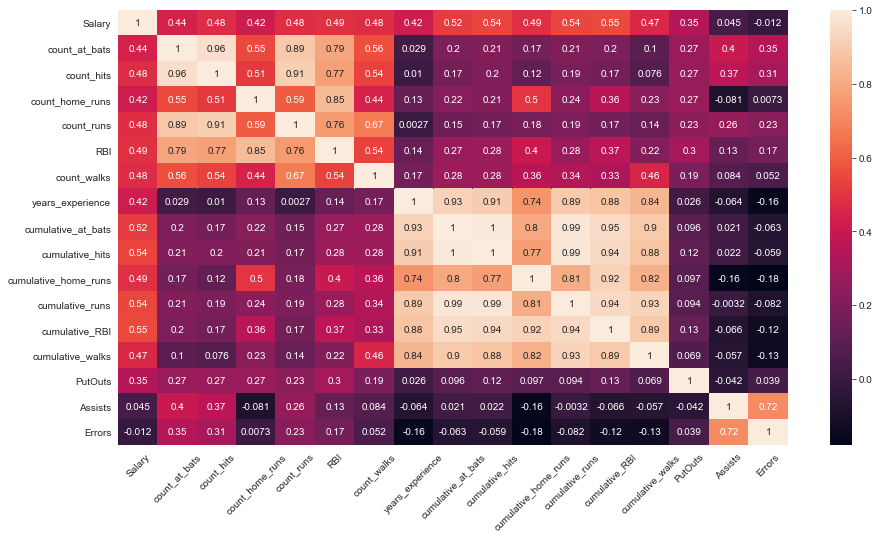

In [27]:
#make heatmap to the the relevancy between salary and other numerical variables
rcParams['figure.figsize'] = (15,8)
hm2=sns.heatmap(sub_df2.corr(),annot=True)
plt.xticks(rotation=45)

# Apply Linear Regression

In [84]:
X=baseball_df_trimmed.drop(['Salary'],axis=1)
y=baseball_df_trimmed['Salary']

In [85]:
lin_reg=LinearRegression()

In [86]:
#use cross validation to find the best mean squared error
neg_MSE = cross_val_score(lin_reg,X,y,cv=5,scoring='neg_mean_squared_error').mean()

In [87]:
MSE_lin_reg=-(neg_MSE).round(3)
print('The MSE for linear regression is {}'.format(MSE_lin_reg))

The MSE for linear regression is 106889554362.431


In [88]:
# RMSE
RMSE=np.sqrt(MSE_lin_reg)
print('The RMSE of the linear regression is {}'.format(RMSE))

The RMSE of the linear regression is 326939.68000600813


In [89]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [90]:
#fit the linear regression model
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [91]:
# use linear regression model to predict salary
salary_y_pred = lin_reg.predict(X_test)

In [92]:
#show the real salary and the salary predicted by linear regression
df_salary_y_pred = pd.DataFrame(salary_y_pred.round(4),columns=['salary_pred_lin'],index=X_test.index)
df_lin_reg_salary=pd.concat([y_test,df_salary_y_pred],axis=1)
df_lin_reg_salary.head()

,Salary,salary_pred_lin
64,200000,7.414532e+05
60,1450000,1.363752e+06
86,850000,7.230342e+05
138,950000,6.692622e+05
169,600000,6.549994e+05


In [97]:
#the coefficients corresponding to every independent variable

cdf_lin=pd.DataFrame(lin_reg.coef_,X.columns,columns=['lin_coeff'])
cdf_lin

,lin_coeff
count_at_bats,-1683.961100
count_hits,6277.462622
count_home_runs,11638.868095
count_runs,-124.209435
RBI,-1995.295646
count_walks,4315.362390
years_experience,5024.220708
cumulative_at_bats,26.818033
cumulative_hits,-467.719747
cumulative_home_runs,-1948.575258


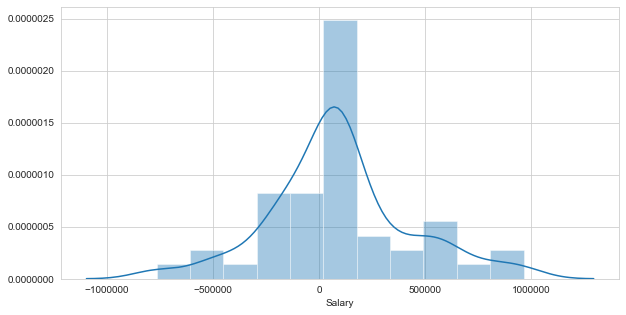

In [98]:
#plot residual of the real salary and the predicted salary
rcParams['figure.figsize'] = (10,5)
sns.distplot(y_test-salary_y_pred)

# Apply ridge regression

In [100]:
# give different values of alpha to make ridge regression model 
ridge=Ridge(normalize=True)
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regression=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)


In [101]:
ridge_regression.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=True, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [102]:
# use ridge regression make prediction
salary_y_pred_ridge = ridge_regression.predict(X_test)

In [105]:
#show the real salary and the salary predicted by ridge regression
df_salary_y_pred_ridge = pd.DataFrame(salary_y_pred_ridge.round(4),columns=['salary_pred_ridge'],index=X_test.index)
df_ridge_salary=pd.concat([y_test,df_salary_y_pred_ridge],axis=1)
df_ridge_salary.head()

,Salary,salary_pred_ridge
64,200000,8.721787e+05
60,1450000,1.126548e+06
86,850000,7.656105e+05
138,950000,6.606766e+05
169,600000,5.385576e+05


In [106]:
#print(ridge_regression.best_score_)
MSE_ridge = -(ridge_regression.best_score_).round(3)
print('The MSE for ridge regression is {}'.format(MSE_ridge))

The MSE for ridge regression is 83055047781.575


In [108]:
RMSE_ridge=np.sqrt(MSE_ridge)
print('The RMSE for ridge regression is {}'.format(RMSE_ridge))

The RMSE for ridge regression is 288192.72680200485


In [109]:
#find the best alpha
print(ridge_regression.best_params_)

{'alpha': 1}


In [110]:
#the coefficients corresponding to every independent variable when alpha is equal to 0.01
ridge=Ridge(alpha=1)
ridge_coef=ridge.fit(X_train,y_train).coef_
cdf_ridge=pd.DataFrame(ridge_coef,X.columns,columns=['Coeff_ridge'])
print(cdf_ridge)

                       Coeff_ridge
count_at_bats         -1703.069372
count_hits             6335.697291
count_home_runs       11755.359088
count_runs             -143.235670
RBI                   -2034.689371
count_walks            4321.790216
years_experience       4887.438806
cumulative_at_bats       32.021458
cumulative_hits        -496.588860
cumulative_home_runs  -2001.195003
cumulative_runs         554.501633
cumulative_RBI         1379.825106
cumulative_walks       -299.830116
PutOuts                 380.063449
Assists                 472.406136
Errors                -6807.499967
league_N              96813.932276
Division_W           -79196.482940
NewLeague_N          -18477.870871


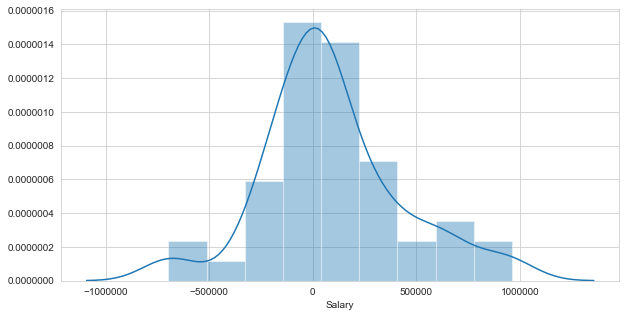

In [111]:
#plot residuals of salary and predicted salary for ridge regression
sns.distplot(y_test-salary_y_pred_ridge)

# Apply Lasso Rregression

In [112]:
# give different values of alpha to make ridge regression model
lasso=Lasso(normalize=True)
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regression=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

In [113]:
lasso_regression.fit(X_train,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3254574852429.96, tolerance: 1536113546.3636365
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3085373370962.646, tolerance: 1753757996.3636365
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3044601560201.613, tolerance: 1650121327.2727275
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 795690674012.0918, tolerance: 1698931567.5675673
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22046294261.38672, tolerance: 1715972369.3693695
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3962118439.734375, tolerance: 1753757996.3636365
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=True, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [114]:
# use lasso regression make prediction
salary_y_pred_lasso = lasso_regression.predict(X_test)

In [118]:
#show the real salary and the salary predicted by lasso regression
df_salary_y_pred_lasso = pd.DataFrame(salary_y_pred_lasso.round(4),columns=['salary_pred_lasso'],index=X_test.index)
df_lasso_salary=pd.concat([y_test,df_salary_y_pred_lasso],axis=1)
df_lasso_salary.head()

,Salary,salary_pred_lasso
64,200000,8.049190e+05
60,1450000,1.335340e+06
86,850000,7.424639e+05
138,950000,6.734553e+05
169,600000,6.091877e+05


In [119]:
#find the lowest MSE
MSE_lasso = -(lasso_regression.best_score_).round(3)
print('The MSE for lasso regression is {}'.format(MSE_lasso))

The MSE for lasso regression is 92024940063.987


In [120]:
#find the lowest RMSE
RMSE_lasso = np.sqrt(MSE_lasso)
print('The RMSE for lasso regression is {}'.format(RMSE_lasso))

The RMSE for lasso regression is 303356.12745416403


In [121]:
#find the best alpha
print(lasso_regression.best_params_)

{'alpha': 100}


In [122]:
#the coefficients corresponding to every independent variable when alpha is equal to 0.001
lasso=Lasso(alpha=100)
lasso_coef=lasso.fit(X_train,y_train).coef_
cdf_lasso=pd.DataFrame(lasso_coef,X.columns,columns=['Coeff_lasso'])
print(cdf_lasso)

                        Coeff_lasso
count_at_bats          -1641.038414
count_hits              6085.897628
count_home_runs        11357.281168
count_runs               -15.658062
RBI                    -1888.794024
count_walks             4267.204082
years_experience        6197.375232
cumulative_at_bats        -0.737992
cumulative_hits         -353.100382
cumulative_home_runs   -1778.296877
cumulative_runs          491.965923
cumulative_RBI          1307.181586
cumulative_walks        -285.018418
PutOuts                  377.203517
Assists                  481.783576
Errors                 -7021.278237
league_N              109515.770283
Division_W            -81130.454712
NewLeague_N           -29220.825463


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4187547324615.3726, tolerance: 2089084238.405797
  positive)


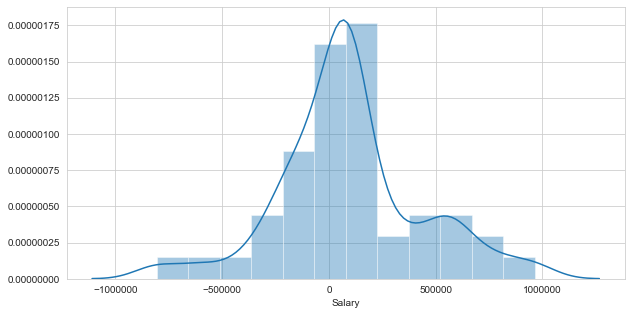

In [123]:
#Plot residuals for lasso regression
sns.distplot(y_test-salary_y_pred_lasso)

In [125]:
#print coeff of linear regression , ridge regression and lasso regression
df_coeff=pd.concat([cdf_lin,cdf_ridge,cdf_lasso],axis=1)

In [126]:
df_coeff

,lin_coeff,Coeff_ridge,Coeff_lasso
count_at_bats,-1683.961100,-1703.069372,-1641.038414
count_hits,6277.462622,6335.697291,6085.897628
count_home_runs,11638.868095,11755.359088,11357.281168
count_runs,-124.209435,-143.235670,-15.658062
RBI,-1995.295646,-2034.689371,-1888.794024
count_walks,4315.362390,4321.790216,4267.204082
years_experience,5024.220708,4887.438806,6197.375232
cumulative_at_bats,26.818033,32.021458,-0.737992
cumulative_hits,-467.719747,-496.588860,-353.100382
cumulative_home_runs,-1948.575258,-2001.195003,-1778.296877


In [146]:
##print RMSE of linear regression , ridge regression and lasso regression
df_RMSE=pd.DataFrame(data=[326939.68,288192.72,303356.12],columns=['RMSE'],index=['Linear','Ridge','Lasso'])                                                                       

In [147]:
df_RMSE

,RMSE
Linear,326939.68
Ridge,288192.72
Lasso,303356.12


# Conclusion:

1. The RMSE of linear regression is 326939.68, Ridge regression is 288192.72, lasso regression is 303356.12. Ridge regression and lasso regression introduce a small amount of bias into the model that does not fit the training data as well as linear regression but provides a better long term prediction.
2. Lasso Regression can exclude useless variables from equations, it is a litter bit better than ridge regression at reducing the variance in models that contain a lot of useless variables.
3. When most variables are useful, ridge regression is better than lasso regression.